In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
from sklearn.model_selection import cross_val_score
import warnings

In [2]:
X,y = make_regression(n_samples=1000, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

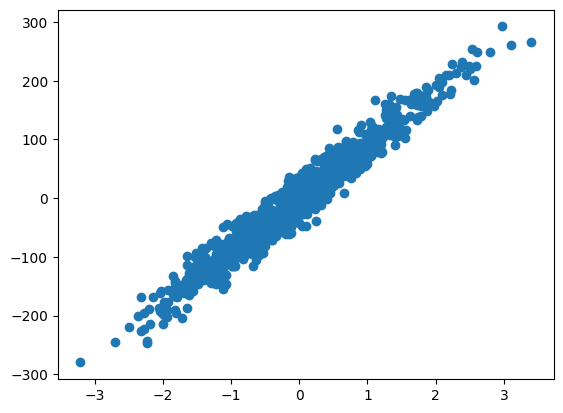

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[89.15929199]
0.5798269647558691


In [7]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9586262587330123

In [8]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,X,y):
        # calcualte the b and m using GD
        for i in range(self.epochs):
            
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,"",self.b)
            
    def predict(self,X):
        return self.m * X + self.b

In [21]:
gd = GDRegressor(0.01,80)

In [22]:
gd.fit(X_train,y_train)

2.011685088021917e+96  -4.2445938695271293e+96


In [23]:
y_predict_gdregression = gd.predict(X_test)
r2_score(y_test,y_predict_gdregression)

-2.3697109169851674e+189

In [24]:
#Regression using BatchGradientDescent and compare with linear regression.
mybgdr = BGDRegressor(epochs=1000,learning_rate=0.5)
mybgdr.fit(X_train,y_train)
y_predict_bgdr = mybgdr.predict(X_test)
r2_score(y_test, y_predict_bgdr)

0.5798269647558704 [89.15929199]


0.9586262587330123

Adding line: 89.159291990425 0.5798269647558691
[ 0 0.5798269647558691 ]  [ 3.7316825447931095 333.2940005915369 ]
Adding line: 89.15929199042505 0.5798269647558704
[ 0 0.5798269647558704 ]  [ 4.078788211896186 364.2416961163116 ]


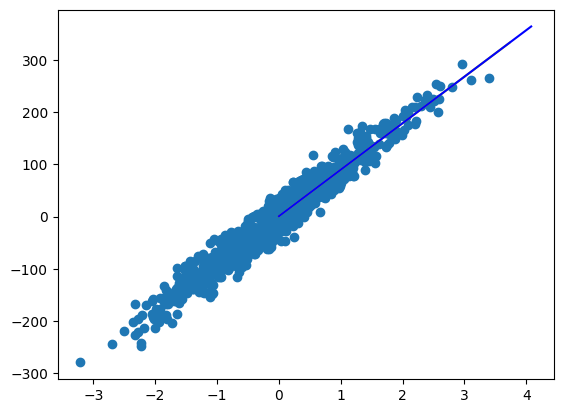

In [68]:
# plot
# ==============================
fig, ax = plt.subplots()
ax.scatter(X,y)

# need a slope and c to fix the position of line
slope = lr.coef_ #y_predict_bgdr.coef_
c = lr.intercept_ #y_predict_bgdr.intercept_
def addLine(slope,c, color='y', label=''):
    print("Adding line:", slope, c)
    x_max = ax.get_xlim()[1]
    x_min = 0
    y_min, y_max = c, c + slope*(x_max-x_min)

    print("[", x_min, y_min, "]  [", x_max,y_max, "]")
    ax.plot([x_min, x_max], [y_min, y_max], c=color, label=label)


addLine(slope=lr.coef_[0], c=lr.intercept_,color='y',label='LR')


#addLine(slope=gd.m, c=gd.b, color='r')

addLine(slope=mybgdr.coef_[0], c=mybgdr.intercept_, color='b',label='BGD')


#x_0,x_1=-0.01,0.01
#y_0,y_1=c + (x_0*slope), c + (x_1*slope)
#print("[", x_0, y_0, "]  [", x_1,y_1,"]")
#fig.add_artist(lines.Line2D([x_0,x_1], [y_0,y_1]))
#fig.add_artist(lines.Line2D([0, 1], [0, 1]))

#fig.add_artist(lines.Line2D([x_min,x_max], [y_min,y_max[0]]))

#fig.show()
#ax.set_xlim([x_min, x_max])


In [27]:
###Batch Gradient Descent

# Load the diabetes data set
from sklearn.datasets import load_diabetes

X_d,y_d = load_diabetes(return_X_y=True)

In [28]:
X_d_train,X_d_test,y_d_train,y_d_test = train_test_split(X_d,y_d,test_size=0.2,random_state=2)

In [31]:
reg_d = LinearRegression()
reg_d.fit(X_d_train,y_d_train)
print(reg_d.coef_, reg_d.intercept_)

y_d_pred = reg_d.predict(X_d_test)
r2_score(y_d_test,y_d_pred)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238] 151.88331005254167


0.4399338661568969

In [15]:
class BGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [32]:
bgdr = BGDRegressor(epochs=1000,learning_rate=0.5)
bgdr.fit(X_d_train,y_d_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [33]:
y_d_pred = bgdr.predict(X_d_test)
r2_score(y_d_test,y_d_pred)

0.45345030347228044

Adding line: 561.2206790412722 151.88331005254167
[ 0 151.88331005254167 ]  [ 0.21450804243912874 272.26965929004353 ]
Adding line: -116.01061213145607 152.01351687661833
[ 0 152.01351687661833 ]  [ 0.23101409786005514 125.21342997287724 ]


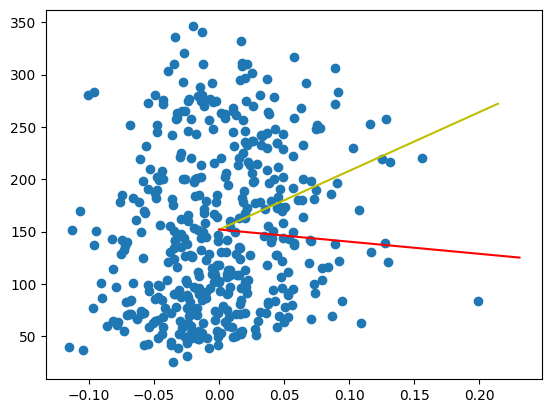

In [67]:
#Plot Second datasets (Diabetes)
fig, ax = plt.subplots()

features_to_show = 5

ax.scatter(X_d[:,features_to_show],y_d)

#Draw selected output from LinearRegression
addLine(slope=reg_d.coef_[features_to_show], c=reg_d.intercept_,color='y')

#Draw selected output from BatchGradientDescent
addLine(slope=bgdr.coef_[features_to_show], c=bgdr.intercept_, color='r')

